# Using Dark Sky to Inform a Move

Northeast winters are brutal.  Colorado winters are delightful.  People are fickle.  I love winter.
Let's get some objective truth in here to help inform my move to Burlington, VT.  I expect more moisture, but my hypothesis is that there are less than 6 months of cloudly weather they exagerate about the humidity...et al.




### goals
* taking calls at morning evening noon and midnight purposefully introduces noise
* using the past (1000) days to predict future weather patterns
* be able to categorize data by weather outlook
* be able to repdict future weather patterns


sample request: https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]

[time] = [YYYY]-[MM]-[DD]T[HH]:[MM]:[SS]

formula to find daylight hours:

$\cos \omega _{\circ }=-\tan \phi \times \tan \delta $

$\omega _{\circ }$ = hour angle at sunrise (when negative) and sunset (when positive) {mean is solar noon}

$\phi$ = latitude of observer

$\delta$ = sun declination

 ω0 by 2⋅24h/2π






## Calling the API

In [3]:
import requests
import numpy as np

In [32]:
resp = requests.get('https://api.darksky.net/forecast/{0}/44.4759,-73.2121,2016-08-15T00:00:00?exclude=flags,alerts,hourly'.format(api_keys["darksky_key"][0]))

In [33]:
resp.status_code == requests.codes.ok

True

In [34]:
resp.status_code


200

### managing multiple requests

In [1]:

# take noon, midnight, sunrise, sunset recordings in sync with the seasons

    
#call midnight 1st then call rise/set using seconds and noon using H12:

#create a counter 0 -> 3 that cycles through these
# highnoon call
# midnight call
# sunset call
# sunrise call

#when saving these dicts ~ hard code a ToD column


### Inspecting a call

In [36]:
print(type(resp.text))

<class 'str'>


In [37]:
print(resp.headers)

{'Date': 'Fri, 24 May 2019 00:54:10 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Authentication-Time': '15ms', 'Cache-Control': 'max-age=3600', 'Expires': 'Fri, 24 May 2019 01:54:10 +0000', 'X-Forecast-API-Calls': '1', 'X-Content-Type-Options': 'nosniff', 'X-Response-Time': '71.927ms', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip'}


In [38]:
test_call = resp.json()
test_call

{'latitude': 44.4759,
 'longitude': -73.2121,
 'timezone': 'America/New_York',
 'currently': {'time': 1471233600,
  'summary': 'Mostly Cloudy',
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 70.76,
  'apparentTemperature': 71.06,
  'dewPoint': 62.44,
  'humidity': 0.75,
  'pressure': 1016.6,
  'windSpeed': 1.21,
  'windGust': 5.51,
  'windBearing': 354,
  'cloudCover': 0.75,
  'uvIndex': 0,
  'visibility': 6.42},
 'daily': {'data': [{'time': 1471233600,
    'summary': 'Mostly cloudy until afternoon.',
    'icon': 'partly-cloudy-day',
    'sunriseTime': 1471255078,
    'sunsetTime': 1471305557,
    'moonPhase': 0.4,
    'precipIntensity': 0,
    'precipIntensityMax': 0,
    'precipProbability': 0,
    'temperatureHigh': 79.41,
    'temperatureHighTime': 1471291200,
    'temperatureLow': 61.72,
    'temperatureLowTime': 1471338000,
    'apparentTemperatureHigh': 79.48,
    'apparentTemperatureHighTime': 1471291200,
    'apparentTempera

In [39]:
test_call.keys()

dict_keys(['latitude', 'longitude', 'timezone', 'currently', 'daily', 'offset'])

Pull these:

{
'currently': {
  'icon': 'clear-day', <br>
  'precipIntensity': 0, <br>
  'precipProbability': 0, <br>
  'temperature': 68.96, <br>
  'apparentTemperature': 68.96, <br>
  'dewPoint': 43.98, <br>
  'humidity': 0.41, <br>
  'pressure': 1013.34, <br>
  'windSpeed': 3.17, <br>
  'windBearing': 320, <br>
  'cloudCover': 0.17, <br>
  'uvIndex': 0, <br>
  'visibility': 10
  
 'daily': {'data': [{'time': 169185600, <br>
    'summary': 'Mostly cloudy until evening.', <br>
    'icon': 'partly-cloudy-day', <br>
    'sunriseTime': 169205359, <br>
    'sunsetTime': 169258302, <br>
    'moonPhase': 0.08,}]}, <br>
 'offset': -4}

### Disecting a call

In [4]:
import itertools
import pandas as pd

In [41]:
test_call_target = test_call['currently']

print(type(test_call_target))

init_features = {}
for key, val in itertools.islice(test_call_target.items(), 0, 13):

    init_features[key] = val

init_features

test_call_second = test_call['daily']['data'][0]
print(test_call_second.keys(), '\n\n')

for key, val in itertools.islice(test_call_second.items(), 3, 6):
    print(key, ":", val)
    init_features[key] = val
init_features

<class 'dict'>
dict_keys(['time', 'summary', 'icon', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensity', 'precipIntensityMax', 'precipProbability', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'windGustTime', 'windBearing', 'cloudCover', 'uvIndex', 'uvIndexTime', 'visibility', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']) 


sunriseTime : 1471255078
sunsetTime : 1471305557
moonPhase : 0.4


{'time': 1471233600,
 'summary': 'Mostly Cloudy',
 'icon': 'partly-cloudy-night',
 'precipIntensity': 0,
 'precipProbability': 0,
 'temperature': 70.76,
 'apparentTemperature': 71.06,
 'dewPoint': 62.44,
 'humidity': 0.75,
 'pressure': 1016.6,
 'windSpeed': 1.21,
 'windGust': 5.51,
 'windBearing': 354,
 'sunriseTime': 1471255078,
 'sunsetTime': 1471305557,
 'moonPhase': 0.4}

In [42]:
#init variable
midnight = test_call['currently']['time']
midnight

1471233600

In [44]:
df = pd.DataFrame([init_features.values()], columns = init_features.keys())

df.head()

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,sunriseTime,sunsetTime,moonPhase
0,1471233600,Mostly Cloudy,partly-cloudy-night,0,0,70.76,71.06,62.44,0.75,1016.6,1.21,5.51,354,1471255078,1471305557,0.4


In [45]:
df.shape

(1, 16)

In [46]:
features = init_features
features

{'time': 1471233600,
 'summary': 'Mostly Cloudy',
 'icon': 'partly-cloudy-night',
 'precipIntensity': 0,
 'precipProbability': 0,
 'temperature': 70.76,
 'apparentTemperature': 71.06,
 'dewPoint': 62.44,
 'humidity': 0.75,
 'pressure': 1016.6,
 'windSpeed': 1.21,
 'windGust': 5.51,
 'windBearing': 354,
 'sunriseTime': 1471255078,
 'sunsetTime': 1471305557,
 'moonPhase': 0.4}

In [85]:
def get_features(target_call):
    current_features = target_call['currently']
    features = {}
    for key, val in itertools.islice(current_features.items(), 0, 13):
        features[key] = val
        
    daily_features = target_call['daily']['data'][0]

    for key, val in itertools.islice(daily_features.items(), 3, 6):
        features[key] = val
    return features

In [65]:
def get_sunrise(features):
    sunrise =  features['sunriseTime']

    resp_rise = requests.get('https://api.darksky.net/forecast/{0}/44.4759,-73.2121,{1}?exclude=flags,alerts,hourly'.format(api_keys["darksky_key"][0], sunrise))

    print("Sunrise:", sunrise, " :", resp_rise.status_code == requests.codes.ok)

    features = get_features(resp_rise.json())
    df_rise = pd.DataFrame([features.values()], columns = features.keys())
    return df_rise

df_rise = get_sunrise(features)  

Sunrise: 1471255078  : True


In [68]:
def get_noon(midnight):
    noon = midnight + 43200

    resp_noon = requests.get('https://api.darksky.net/forecast/{0}/44.4759,-73.2121,{1}?exclude=flags,alerts,hourly'.format(api_keys["darksky_key"][0], noon))

    print("High Noon:", noon, " :", resp_noon.status_code == requests.codes.ok)

    features = get_features(resp_noon.json())
    df_noon = pd.DataFrame([features.values()], columns = features.keys())
    return df_noon

df_noon = get_noon(midnight)

High Noon: 1471276800  : True


In [50]:
def get_sunset(features):
    sunset = features['sunsetTime']

    resp_set = requests.get(f'https://api.darksky.net/forecast/{0}/44.4759,-73.2121,{sunset}?exclude=flags,alerts,hourly').format(api_keys["darksky_key"][0])

    print("Sunset:", sunset, " :", resp_set.status_code == requests.codes.ok)

    features = get_features(resp_set.json())
    df_set = pd.DataFrame([features.values()], columns = features.keys())


In [51]:
def get_next_midnight(midnight):
    midnight = midnight + (43200*2)

    resp_midnight = requests.get(f'https://api.darksky.net/forecast/{0}/44.4759,-73.2121,{midnight}?exclude=flags,alerts,hourly').format(api_keys["darksky_key"][0])

    print("Midnight:", midnight, " :", resp_set.status_code == requests.codes.ok)

    features = get_features(resp_midnight.json())
    df_night = pd.DataFrame([features.values()], columns = features.keys())
    
    return midnight

In [69]:
def feed_df_test(main_df, new_row):
    updated_df = pd.concat([main_df, new_row], axis=0, sort=False)
    main_df = updated_df.copy()
    return main_df

my_df = feed_df_test(df, df_rise)
my_df = feed_df_test(my_df, df_noon)
my_df

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,sunriseTime,sunsetTime,moonPhase
0,1471233600,Mostly Cloudy,partly-cloudy-night,0,0,70.76,71.06,62.44,0.75,1016.60,1.21,5.51,354,1471255078,1471305557,0.4
0,1471255078,Overcast,cloudy,0,0,67.00,67.24,61.17,0.82,1019.08,1.01,2.48,318,1471255078,1471305557,0.4
0,1471276800,Mostly Cloudy,partly-cloudy-day,0,0,74.71,75.00,62.73,0.66,1022.09,2.03,6.62,332,1471255078,1471305557,0.4


In [54]:
weather_df = pd.DataFrame()

test run

''' <br>
df_rise = get_sunrise(features) <br>
weather_df = feed_df_test(weather_df, df_rise) <br>
get_noon(midnight) <br> 
weather_df = feed_df_test(weather_df, df_noon) <br>
get_sunset(features) <br>
weather_df = feed_df_test(weather_df, df_set) <br>
get_next_midnight(midnight) <br>
weather_df = feed_df_test(weather_df, df_night) <br>
'''

In [151]:
df.columns

Index(['time', 'summary', 'icon', 'precipIntensity', 'precipProbability',
       'temperature', 'apparentTemperature', 'dewPoint', 'humidity',
       'pressure', 'windSpeed', 'windGust', 'windBearing', 'sunriseTime',
       'sunsetTime', 'moonPhase'],
      dtype='object')

In [156]:
print(df.columns, test_df.columns)


Index(['time', 'summary', 'icon', 'precipIntensity', 'precipProbability',
       'temperature', 'apparentTemperature', 'dewPoint', 'humidity',
       'pressure', 'windSpeed', 'windGust', 'windBearing', 'sunriseTime',
       'sunsetTime', 'moonPhase'],
      dtype='object') Index(['apparentTemperature', 'dewPoint', 'humidity', 'icon', 'moonPhase',
       'precipIntensity', 'precipProbability', 'precipType', 'pressure',
       'summary', 'sunriseTime', 'sunsetTime', 'temperature', 'time',
       'windBearing', 'windGust', 'windSpeed'],
      dtype='object')


In [167]:
test_df = pd.DataFrame()
test_df.head()

""


In [145]:
def feed_df(main_df, sunrise, noon, sunset, night):
    test_df = pd.concat([main_df, sunrise], axis=0, sort=False)
    print(test_df.shape)
    test_df = pd.concat([main_df, noon], axis=0, sort=False)
    print(test_df.shape)
    test_df = pd.concat([main_df, sunset], axis=0, sort=False)
    print(test_df.shape)
    test_df = pd.concat([main_df, night], axis=0, sort=False)
    print(test_df.shape)
    
feed_df(test_df, df_rise, df_noon, df_set, df_night)

test_df

(1, 16)
(1, 16)
(1, 16)
(1, 16)


""


In [158]:
set_test = resp_rise.json()
set_test['currently']


{'time': 1472206251,
 'summary': 'Light Rain',
 'icon': 'rain',
 'precipIntensity': 0.0148,
 'precipProbability': 0.66,
 'precipType': 'rain',
 'temperature': 71.38,
 'apparentTemperature': 72.49,
 'dewPoint': 68.63,
 'humidity': 0.91,
 'pressure': 1012.55,
 'windSpeed': 1.38,
 'windGust': 4.01,
 'windBearing': 189,
 'cloudCover': 1,
 'uvIndex': 0,
 'visibility': 4.43}

In [62]:
features = get_features(resp_rise.json())
df1 = pd.DataFrame([features.values()], columns = features.keys())

df1

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,sunriseTime,sunsetTime,moonPhase
0,1471255078,Overcast,cloudy,0,0,67,67.24,61.17,0.82,1019.08,1.01,2.48,318,1471255078,1471305557,0.4


In [63]:
test_df = pd.concat([df, df1], axis=0, ignore_index=True)

test_df

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,sunriseTime,sunsetTime,moonPhase
0,1471233600,Mostly Cloudy,partly-cloudy-night,0,0,70.76,71.06,62.44,0.75,1016.60,1.21,5.51,354,1471255078,1471305557,0.4
1,1471255078,Overcast,cloudy,0,0,67.00,67.24,61.17,0.82,1019.08,1.01,2.48,318,1471255078,1471305557,0.4


In [70]:
print("(╯°□°)╯︵ ʞooqǝɔɐɟ")

(╯°□°)╯︵ ʞooqǝɔɐɟ


In [86]:
get_features(resp_rise)

NameError: name 'resp_rise' is not defined

In [105]:
sunrise = weather_df.tail(1)['sunriseTime']
sunrise = dict(sunrise)
sunrise = sunrise[0]
sunrise

1471255078

In [103]:
df.tail(1)['time']

0    1471233600
Name: time, dtype: int64

## Get DF F(x)

gets a weather dataframe and start cohersing the data into a useable form.


In [7]:

def create_new_row(main_df, new_row):
    updated_df = pd.concat([main_df, new_row], axis=0, sort=True)
    main_df = updated_df.copy()
    return main_df

In [8]:
def get_sunrise(df):

    sunrise = df.tail(1)['sunriseTime']
    sunrise = dict(sunrise)
    for key, item in sunrise.items():
        rise_time = item
    rise_time
    
    resp_rise = requests.get('https://api.darksky.net/forecast/{0}/44.4759,-73.2121,{1}?exclude=flags,alerts,hourly'.format(api_keys["darksky_key"][0],rise_time))

    print("Sunrise:", rise_time, " :", resp_rise.status_code == requests.codes.ok)
    features = get_features(resp_rise.json())
    df_rise = pd.DataFrame([features.values()], columns = features.keys())
    return df_rise


In [9]:
def get_noon(midnight):
    noon = midnight + 43200

    resp_noon = requests.get('https://api.darksky.net/forecast/{0}/44.4759,-73.2121,{1}?exclude=flags,alerts,hourly'.format(api_keys["darksky_key"][0], noon))

    print("High Noon:", noon, " :", resp_noon.status_code == requests.codes.ok)

    features = get_features(resp_noon.json())
    df_noon = pd.DataFrame([features.values()], columns = features.keys())
    return df_noon
    


In [10]:
def get_sunset(df):
    sunset = df.tail(1)['sunsetTime']
    sunset = dict(sunset)
    for key, item in sunset.items():
        set_time = item
    set_time
    
    resp_set = requests.get('https://api.darksky.net/forecast/{0}/44.4759,-73.2121,{1}?exclude=flags,alerts,hourly'.format(api_keys["darksky_key"][0], set_time))

    print("Sunset:", set_time, " :", resp_set.status_code == requests.codes.ok)

    features = get_features(resp_set.json())
    df_set = pd.DataFrame([features.values()], columns = features.keys())

    return df_set


In [11]:
def get_next_midnight(midnight):
    midnight = midnight + (43200*2)

    resp_midnight = requests.get('https://api.darksky.net/forecast/{0}/44.4759,-73.2121,{1}?exclude=flags,alerts,hourly'.format(api_keys["darksky_key"][0], midnight))

    print("Midnight:", midnight, " :", resp_midnight.status_code == requests.codes.ok)

    features = get_features(resp_midnight.json())
    df_night = pd.DataFrame([features.values()], columns = features.keys())
    
    return midnight, df_night

In [12]:
# wrapper fx that sets new df to save all work to and initializes a time
def collect_data(time, runs):
    resp = requests.get('https://api.darksky.net/forecast/{0}/44.4759,-73.2121,{1}?exclude=flags,alerts,hourly'.format(api_keys["darksky_key"][0], time))

    print(f"init : {resp.status_code == requests.codes.ok}")
    
    first_call = resp.json()
    
    features = get_features(first_call)

    midnight = first_call['currently']['time']
    midnight

    df = pd.DataFrame([features.values()], columns = features.keys())

####################################
####   Loop  ( ͡° ͜ʖ ͡°)           ####
####################################

    for i in range(0, runs):
        df_rise = get_sunrise(df)
        df = create_new_row(df, df_rise)
        df_noon = get_noon(midnight)
        df = create_new_row(df, df_noon)
        df_set = get_sunset(df)
        df = create_new_row(df, df_set)
        midnight, df_night = get_next_midnight(midnight)
        df = create_new_row(df, df_night)
        print(f"Day: {i}")
    print(f"Time: {midnight}")
    df.reset_index(drop=True)
    return df


In [253]:
# weather_df_next = collect_data(1541304000, 244)

# Data Collected

~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~ ~~

### Verify Data are Collected



In [1]:
weather_df.to_csv('Burlington_weather2.csv')

NameError: name 'weather_df' is not defined

In [646]:
weather_df_copy.to_csv('Burlington_weather.csv')

In [5]:
weather_df_copy = pd.read_csv('Burlington_weather2.csv')
weather_df_copy.shape

(2780, 24)

## Cleaning data

In [6]:
weather_df_copy = weather_df_copy.drop(['Unnamed: 0', 'cloudCover',
                                         'precipIntensityError',
                                         'precipProbabilityError',
                                         'temperatureError'], axis=1)
# some of these features are only given for very recent rows.
# Others express engineered knowledge shall remain forbidden so that I may create my own features.


weather_df_copy.isna().sum()

apparentTemperature       8
dewPoint                  8
humidity                  8
icon                      7
moonPhase                 0
precipIntensity          27
precipProbability        27
precipType             2234
pressure                133
summary                   7
sunriseTime               0
sunsetTime                0
temperature               8
time                      0
uvIndex                2767
visibility             2779
windBearing             537
windGust                148
windSpeed               135
dtype: int64

In [7]:
# the source of a lot of those NaNs
weather_df_copy[weather_df_copy['temperature'].isna()]

,apparentTemperature,dewPoint,humidity,icon,moonPhase,precipIntensity,precipProbability,precipType,pressure,summary,sunriseTime,sunsetTime,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
1264,NaN,NaN,NaN,NaN,0.33,NaN,NaN,NaN,NaN,NaN,1529658589,1529714556,NaN,1529683200,NaN,NaN,NaN,NaN,NaN
1288,NaN,NaN,NaN,NaN,0.52,NaN,NaN,NaN,NaN,NaN,1530177115,1530232972,NaN,1530201600,NaN,NaN,NaN,NaN,NaN
1366,NaN,NaN,NaN,clear-night,0.21,NaN,NaN,NaN,1010.01,Clear,1531905989,1531960438,NaN,1531886400,0.0,NaN,NaN,NaN,NaN
1392,NaN,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,1532424751,1532478513,NaN,1532448000,NaN,NaN,NaN,NaN,NaN
1781,NaN,NaN,NaN,NaN,0.67,NaN,NaN,NaN,NaN,NaN,1540812460,1540849667,NaN,1540849667,0.0,NaN,NaN,NaN,NaN
2291,NaN,NaN,NaN,NaN,0.97,NaN,NaN,NaN,NaN,NaN,1551785078,1551826013,NaN,1551844800,0.0,NaN,NaN,NaN,NaN
2295,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,1551871372,1551912491,NaN,1551931200,0.0,NaN,NaN,NaN,NaN
2409,NaN,NaN,NaN,NaN,0.97,NaN,NaN,NaN,NaN,NaN,1554373769,1554420260,NaN,1554393600,NaN,NaN,NaN,NaN,NaN


#### Filling NAs in an informed way

In [8]:
weather_df_copy = weather_df_copy.dropna(thresh=15)
weather_df_copy.isna().sum()

apparentTemperature       0
dewPoint                  0
humidity                  0
icon                      0
moonPhase                 0
precipIntensity          11
precipProbability        11
precipType             2226
pressure                  1
summary                   0
sunriseTime               0
sunsetTime                0
temperature               0
time                      0
uvIndex                2631
visibility             2638
windBearing             402
windGust                  7
windSpeed                 0
dtype: int64

In [9]:
def na_is_0(df, col):
    df[col].fillna(0, inplace=True)
    return df

weather_df_copy = na_is_0(weather_df_copy, 'precipType')
weather_df_copy = na_is_0(weather_df_copy, 'windBearing')
weather_df_copy = na_is_0(weather_df_copy, 'windSpeed')


In [10]:
weather_df_copy['summary'][weather_df_copy["precipProbability"].isna()]

1234       Clear
1644       Clear
1698       Clear
1706       Clear
1722       Clear
1800       Foggy
1991       Clear
2003       Clear
2211       Clear
2257    Overcast
2273       Clear
Name: summary, dtype: object

In [11]:
weather_df_copy['precipType'][weather_df_copy["precipProbability"].isna()]

1234    rain
1644    rain
1698    rain
1706    rain
1722    rain
1800    rain
1991    rain
2003    snow
2211    snow
2257    snow
2273    snow
Name: precipType, dtype: object

In [12]:
weather_df_copy[(weather_df_copy['summary'] == 'Clear') | (weather_df_copy['precipType'] == 'rain')].describe().iloc[:,4:6]

,precipIntensity,precipProbability
count,1245.000000,1245.000000
mean,0.002983,0.099237
std,0.009837,0.215244
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000100,0.010000
max,0.088700,0.910000


We see that all of our missing precip Probability values are for days it rained.  Let's make a sub selection of rainy days.

In [13]:
weather_df_copy['precipProbability'].fillna(0.099237, inplace=True)
weather_df_copy['precipIntensity'].fillna(0.002983, inplace=True)

In [14]:
weather_df_copy.isna().sum()

apparentTemperature       0
dewPoint                  0
humidity                  0
icon                      0
moonPhase                 0
precipIntensity           0
precipProbability         0
precipType                0
pressure                  1
summary                   0
sunriseTime               0
sunsetTime                0
temperature               0
time                      0
uvIndex                2631
visibility             2638
windBearing               0
windGust                  7
windSpeed                 0
dtype: int64

In [15]:
weather_df_copy['icon'][weather_df_copy["pressure"].isna()].head(20)

1402    clear-night
Name: icon, dtype: object

In [16]:
weather_df_copy[weather_df_copy['icon'] == 'clear-night'].describe()

,apparentTemperature,dewPoint,humidity,moonPhase,precipIntensity,precipProbability,pressure,sunriseTime,sunsetTime,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,715.000000,7.160000e+02,7.160000e+02,716.000000,7.160000e+02,7.0,0.0,716.000000,711.000000,716.000000
mean,44.557291,34.058352,0.672654,0.468520,0.000036,0.001724,1021.101804,1.529386e+09,1.529431e+09,44.865628,1.529401e+09,0.0,NaN,177.108939,4.998790,1.822640
std,23.074121,22.835569,0.153169,0.301142,0.000329,0.017130,7.366184,1.644993e+07,1.645028e+07,22.368449,1.645157e+07,0.0,NaN,98.707306,3.537922,1.594918
min,-14.680000,-22.870000,0.190000,0.000000,0.000000,0.000000,999.140000,1.503223e+09,1.503273e+09,-14.680000,1.503202e+09,0.0,NaN,0.000000,0.660000,0.030000
25%,26.935000,15.365000,0.580000,0.210000,0.000000,0.000000,1015.790000,1.515933e+09,1.515966e+09,27.840000,1.515958e+09,0.0,NaN,117.750000,2.610000,0.660000
50%,48.975000,38.985000,0.690000,0.420000,0.000000,0.000000,1020.290000,1.529356e+09,1.529412e+09,49.375000,1.529356e+09,0.0,NaN,170.000000,4.020000,1.400000
75%,63.125000,51.910000,0.800000,0.740000,0.000000,0.000000,1025.855000,1.542996e+09,1.543030e+09,63.097500,1.542996e+09,0.0,NaN,231.250000,6.475000,2.482500
max,91.790000,75.090000,0.950000,0.990000,0.004000,0.300000,1044.280000,1.559639e+09,1.559695e+09,85.180000,1.559639e+09,0.0,NaN,359.000000,21.740000,10.680000


In [17]:
weather_df_copy['pressure'].fillna(1021.101804, inplace=True)
weather_df_copy.isna().sum()

apparentTemperature       0
dewPoint                  0
humidity                  0
icon                      0
moonPhase                 0
precipIntensity           0
precipProbability         0
precipType                0
pressure                  0
summary                   0
sunriseTime               0
sunsetTime                0
temperature               0
time                      0
uvIndex                2631
visibility             2638
windBearing               0
windGust                  7
windSpeed                 0
dtype: int64

We will be dropping the features with NaNs that remain in the future

### Feature engineering

after collecting enough data we want to get more data out of what we have.  The first is to convert our time data as best as possible.  Each entry is in seconds and since the number of daylight hours.

define fx that will add a column ' temp change' ' pressure change'
convert sunriseTime and sunsetTime to numbers that make sense

In [18]:


weather_df_copy['time'] = pd.to_datetime(weather_df_copy['time'], unit='s')

# time is four hours ahead because of timezone +4 GMT
weather_df_copy['time'] = weather_df_copy['time'] - pd.Timedelta(hours = 4)
weather_df_copy.set_index(pd.DatetimeIndex(weather_df_copy['time']), inplace=True, drop=False)

In [19]:
weather_df_copy.head()

,apparentTemperature,dewPoint,humidity,icon,moonPhase,precipIntensity,precipProbability,precipType,pressure,summary,sunriseTime,sunsetTime,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
time,,,,,,,,,,,,,,,,,,,
2017-08-19 00:00:00,71.68,67.26,0.89,rain,0.93,0.0198,0.38,rain,1007.80,Drizzle,1503136943,1503186797,70.73,2017-08-19 00:00:00,NaN,NaN,0.0,4.41,0.77
2017-08-19 06:02:23,68.79,65.57,0.92,cloudy,0.93,0.0000,0.00,0,1007.33,Overcast,1503136943,1503186797,67.97,2017-08-19 06:02:23,NaN,NaN,171.0,1.79,0.45
2017-08-19 12:00:00,78.53,68.06,0.72,cloudy,0.93,0.0000,0.00,0,1008.19,Overcast,1503136943,1503186797,77.66,2017-08-19 12:00:00,NaN,NaN,204.0,6.69,2.66
2017-08-19 19:53:17,74.02,62.58,0.68,partly-cloudy-night,0.93,0.0000,0.00,0,1008.20,Mostly Cloudy,1503136943,1503186797,73.74,2017-08-19 19:53:17,NaN,NaN,263.0,5.88,1.92
2017-08-20 00:00:00,65.66,60.02,0.82,clear-night,0.96,0.0000,0.00,0,1010.01,Clear,1503223413,1503273099,65.53,2017-08-20 00:00:00,NaN,NaN,156.0,1.49,0.24


In [20]:
# daylight hours

# sunset - sunrise / 3600
def add_daylight_hours(df):
    df['daylightHours'] = ((df['sunsetTime'] - df['sunriseTime']) / 3600)
    

add_daylight_hours(weather_df_copy)


In [21]:
weather_df_copy = weather_df_copy[weather_df_copy.time <= '2019-05-25']
winter_18 = weather_df_copy[(weather_df_copy.time <= '2019-03-25') & (weather_df_copy.time >= '2018-11-25')].shape

In [22]:

# change in temp

# shift method in pandas
weather_df_copy['tempChange6'] = weather_df_copy['temperature'] - weather_df_copy['temperature'].shift(1)
weather_df_copy['tempChange12'] = weather_df_copy['temperature'] - weather_df_copy['temperature'].shift(2)
weather_df_copy['tempChange24'] = weather_df_copy['temperature'] - weather_df_copy['temperature'].shift(4)

In [23]:
# change in pressure
weather_df_copy['pressureChange6'] = weather_df_copy['pressure'] - weather_df_copy['pressure'].shift(1)
weather_df_copy['pressureChange12'] = weather_df_copy['pressure'] - weather_df_copy['pressure'].shift(2)
weather_df_copy['pressureChange24'] = weather_df_copy['pressure'] - weather_df_copy['pressure'].shift(4)

This timeshifted variable will create a few NaN values in the DF.  we can drop these values or set them to 0 to expect no change

In [24]:
print(weather_df_copy.shape)
weather_df_copy.describe()

(2596, 26)


,apparentTemperature,dewPoint,humidity,moonPhase,precipIntensity,precipProbability,pressure,sunriseTime,sunsetTime,temperature,...,windBearing,windGust,windSpeed,daylightHours,tempChange6,tempChange12,tempChange24,pressureChange6,pressureChange12,pressureChange24
count,2596.000000,2596.000000,2596.000000,2596.00000,2596.000000,2596.000000,2596.000000,2.596000e+03,2.596000e+03,2596.000000,...,2596.000000,2589.000000,2596.000000,2596.000000,2595.000000,2594.000000,2592.000000,2595.000000,2594.000000,2592.000000
mean,42.750162,34.139357,0.700520,0.49022,0.001397,0.053510,1017.225186,1.530435e+09,1.530477e+09,43.865555,...,176.426040,7.503295,2.823093,11.865550,-0.008166,-0.012548,-0.026343,0.005025,0.009965,0.010988
std,21.925042,20.693710,0.153348,0.29121,0.006669,0.160924,8.798903,1.631975e+07,1.632039e+07,20.487208,...,115.328812,4.738687,2.110404,2.176156,8.588981,10.515755,9.668145,5.820512,6.957706,9.644018
min,-19.270000,-22.870000,0.190000,0.00000,0.000000,0.000000,979.100000,1.503137e+09,1.503187e+09,-14.680000,...,0.000000,0.500000,0.030000,8.827778,-39.300000,-43.450000,-49.320000,-33.120000,-44.840000,-38.250000
25%,27.270000,19.467500,0.600000,0.23000,0.000000,0.000000,1011.880000,1.516192e+09,1.516225e+09,29.565000,...,95.000000,3.870000,1.150000,9.792222,-4.920000,-7.697500,-5.407500,-2.280000,-3.560000,-5.875000
50%,42.120000,33.995000,0.710000,0.48000,0.000000,0.000000,1017.400000,1.530436e+09,1.530492e+09,43.090000,...,178.000000,6.550000,2.370000,11.780556,-1.390000,-1.075000,0.460000,0.210000,0.250000,0.065000
75%,60.602500,50.855000,0.830000,0.74000,0.000000,0.000000,1023.032500,1.544531e+09,1.544563e+09,60.592500,...,284.000000,10.210000,4.012500,13.729306,3.290000,6.995000,5.720000,2.095000,3.650000,6.072500
max,99.470000,75.090000,0.980000,0.99000,0.076000,0.910000,1044.410000,1.558776e+09,1.558830e+09,90.560000,...,359.000000,28.630000,13.810000,15.547222,38.560000,43.940000,34.020000,35.730000,37.780000,35.630000


In [146]:
import pandas_profiling

In [147]:
pandas_profiling.ProfileReport(weather_df_copy.drop(['time'], axis=1))

Number of variables,26
Number of observations,2596
Total Missing (%),7.7%
Total size in memory,527.4 KiB
Average record size in memory,208.0 B
Numeric,17
Categorical,3
Boolean,1
Date,1
Text (Unique),0
Rejected,4


To retrieve the list of variables which are rejected due to high correlation:

profile = pandas_profiling.ProfileReport(df)
rejected_variables = profile.get_rejected_variables(threshold=0.9)
If you want to generate a HTML report file, save the ProfileReport to an object and use the to_file() function:

profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="output.html")

In [148]:
profile = pandas_profiling.ProfileReport(weather_df_copy.drop(['time'], axis=1))
rejected_variables = profile.get_rejected_variables(threshold=0.9)
rejected_variables

['dewPoint', 'sunsetTime', 'temperature', 'windSpeed']

In [25]:
import matplotlib.pyplot as plt

In [160]:
%store model_copy
%store weather_df_copy

Stored 'model_copy' (DataFrame)
Stored 'weather_df_copy' (DataFrame)


In [27]:
%store -r

In [28]:
color = dict(zip(model_copy.summary.unique(), colors))

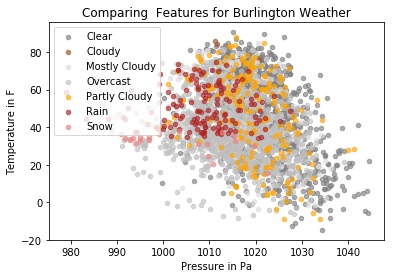

In [31]:
fig, ax = plt.subplots()

grouped = model_copy.groupby('summary')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='pressure', y='temperature',
               label=key, color=color[key], alpha=0.65)
plt.xlabel('Pressure in Pa')
plt.ylabel("Temperature in F")
plt.title("Comparing  Features for Burlington Weather")
fig.savefig("summary2.png")
plt.show();

##  1st Iteration: Decision Tree

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, f1_score
from sklearn import tree 
import sklearn.preprocessing as preprocessing

In [33]:
model_copy = weather_df_copy.copy()
model_copy['summary'].unique()

array(['Drizzle', 'Overcast', 'Mostly Cloudy', 'Clear', 'Partly Cloudy',
       'Light Rain', 'Rain', 'Foggy', 'Light Snow', 'Flurries',
       'Light Sleet', 'Humid', 'Humid and Partly Cloudy',
       'Humid and Mostly Cloudy'], dtype=object)

Here we will do some final cleaning of our data, starting with dropping the first few rows for the time shifted data and then combining some analagous labels, finally we will drop the hightly coorelated and useless features.

In [34]:
model_copy = model_copy.iloc[4:-1]
model_copy.isna().sum()
print(model_copy.shape, weather_df_copy.shape)
print(model_copy.isna().sum())

(2591, 26) (2596, 26)
apparentTemperature       0
dewPoint                  0
humidity                  0
icon                      0
moonPhase                 0
precipIntensity           0
precipProbability         0
precipType                0
pressure                  0
summary                   0
sunriseTime               0
sunsetTime                0
temperature               0
time                      0
uvIndex                2583
visibility             2590
windBearing               0
windGust                  7
windSpeed                 0
daylightHours             0
tempChange6               0
tempChange12              0
tempChange24              0
pressureChange6           0
pressureChange12          0
pressureChange24          0
dtype: int64


In order to get better results for this test lets combine a few categories here.  There will be 2 kinds of preciptation.  Snow and Rain and we draw the distiction at flurries.

In [35]:
model_copy['summary'].replace({'Light Rain': 'Rain',
                                'Drizzle': 'Rain',
                                'Light Sleet': 'Rain',
                                'Flurries': 'Snow',
                                'Light Snow': 'Snow',
                               'Humid and Partly Cloudy' : 'Partly Cloudy',
                               'Humid and Mostly Cloudy' : 'Cloudy',
                               'Humid' : 'Clear',
                               'Foggy' : 'Overcast',
                              }, inplace=True)
model_copy['summary'].unique()

array(['Clear', 'Overcast', 'Mostly Cloudy', 'Partly Cloudy', 'Rain',
       'Snow', 'Cloudy'], dtype=object)

In [36]:
print(model_copy[model_copy['summary'] == 'Snow'].shape, model_copy[model_copy['summary'] == 'Rain'].shape)

(20, 26) (141, 26)


Given that a weather model should be able to predict snow and rain more appropriately, we should consider upsampling these results 

In [37]:
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

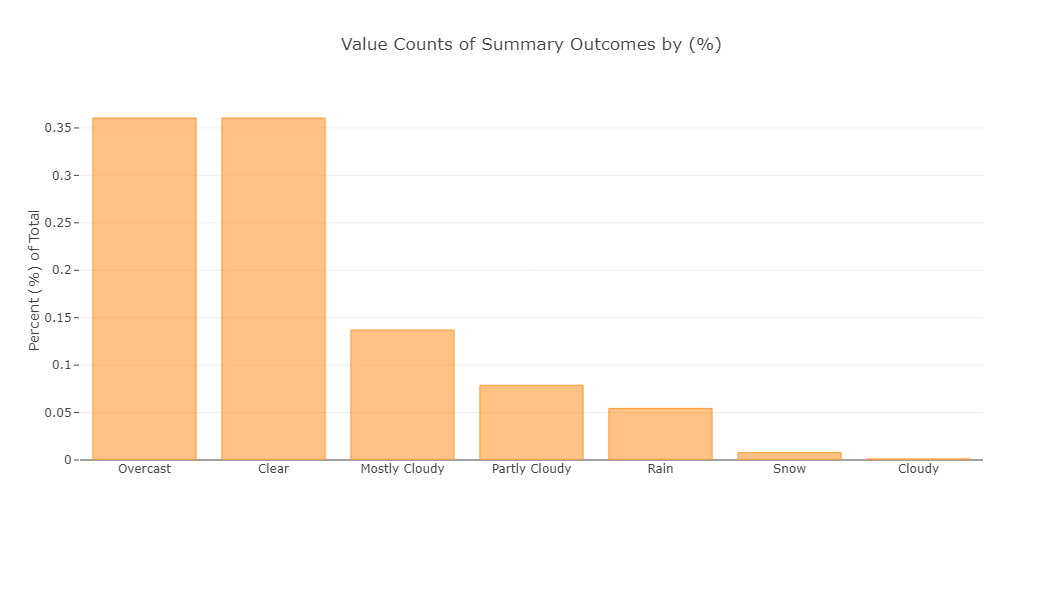

In [72]:
model_copy.summary.value_counts(normalize=True).iplot(

    kind='bar',
            layout=dict(
            height=600,
            yaxis=dict(title='Percent (%) of Total',
                      ticks ="outside"),
            title='Value Counts of Summary Outcomes by (%)',
            margin=dict(b=140)))

In [73]:
model_copy['precipType'].replace(0, "none", inplace=True)
model_copy['precipType'].unique()

array(['none', 'rain', 'snow', 'sleet'], dtype=object)

In [74]:
lb = preprocessing.LabelEncoder()
model_copy["summary"] = lb.fit_transform(model_copy["summary"])
model_copy["precipType"] = lb.fit_transform(model_copy["precipType"])


X = None

In [75]:
X = model_copy.drop(['apparentTemperature',
                    'dewPoint',
                    'uvIndex',
                    'visibility',
                    'windGust',
                    'sunsetTime',
                     'icon',
                     'time'
                    ],
                    axis=1)

In [76]:

Y = model_copy['summary']
minmax = preprocessing.MinMaxScaler()

X = minmax.fit_transform(X)
enc = preprocessing.OneHotEncoder()

enc.fit(X)

onehotX = enc.transform(X).toarray()

onehotX.shape, X.shape

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



((2591, 35), (2591, 18))

In [133]:
Y.head()

time
2017-08-20 00:00:00    0
2017-08-20 06:03:33    3
2017-08-20 12:00:00    2
2017-08-20 19:51:39    0
2017-08-21 00:00:00    0
Name: summary, dtype: int32

In [78]:
x_tr, x_ts, y_tr, y_ts = train_test_split(onehotX, Y, test_size = 0.3)

In [79]:
treeclf = DecisionTreeClassifier(criterion='entropy')
treeclf.fit(x_tr, y_tr)
y_pred = treeclf.predict(x_ts)

# Calculate Accuracy 
acc = accuracy_score(y_ts, y_pred) * 100
print("Accuracy of test set is : {0}".format(round(acc, 4)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_ts, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy of test set is : 39.0746

Confusion Matrix
----------------


Predicted,0,2,3,6,All
True,,,,,
0,287,2,4,0,293
1,1,0,0,0,1
2,115,0,1,0,116
3,254,1,10,0,265
4,52,1,1,0,54
5,42,0,0,0,42
6,0,0,0,7,7
All,751,4,16,7,778


In [81]:
ss = preprocessing.StandardScaler()
X2 = ss.fit_transform(onehotX)
x_tr, x_ts, y_tr, y_ts = train_test_split(X2, Y, test_size = 0.3)

In [82]:
treeclf = DecisionTreeClassifier(criterion='entropy')
treeclf.fit(x_tr, y_tr)
y_pred = treeclf.predict(x_ts)

# Calculate Accuracy 
acc = accuracy_score(y_ts, y_pred) * 100
print("Accuracy is : {0}".format(round(acc, 4)))


Accuracy is : 36.3753


### 2nd Iteration : Decision Tree + Hyperparameters

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X, Y, test_size = 0.3)
treeclf2 = DecisionTreeClassifier()


param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_split": [1.0, 5, 10, 20]
}

gs_tree = GridSearchCV(treeclf2, param_grid, cv=3)
gs_tree.fit(x_tr, y_tr)

gs_tree.best_params_


C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning:

The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.



{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}

In [85]:

dt_gs_training_score = np.mean(gs_tree.cv_results_['mean_train_score'])
dt_gs_testing_score = gs_tree.score(x_ts, y_ts)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search: \n {0}".format(gs_tree.best_params_))

Mean Training Score: 86.28%
Mean Testing Score: 100.0%
Best Parameter Combination Found During Grid Search: 
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}


C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True



Exploring our features.  Get most important features.  This is a good point to check on things before stepping up to an ensemble method

In [86]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 5)


In [87]:
clf.fit(x_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
clf.feature_importances_

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

We can see that "precipType" accounts for all of the predictive power of this model.  To support an ethical model we must remove features that are inappropriate.  In the case of weather using the precipitation type might make for a slightly more accurate model but feels like cheating.  Using certain facial structures to detect faces might make a model better but also introduce an ethical bias.  We must always be aware of how our code interacts with the real world.

In [135]:
X = None
X = model_copy.drop(['apparentTemperature',
                    'dewPoint',
                    'uvIndex',
                    'visibility',
                    'windGust',
                    'sunsetTime',
                     'icon',
                     'time',
                     'precipType',
                     'summary'
                    ],
                    axis=1)
feature_importance = X.copy()

In [136]:
print(type(X), type(model_copy))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


### 3rd Iteration : w/o Cheating

In [137]:

Y = model_copy['summary']


minmax = preprocessing.MinMaxScaler()

X = minmax.fit_transform(X)
'''
enc = preprocessing.OneHotEncoder(categories='auto')

enc.fit(X)

onehotX = enc.transform(X).toarray()

onehotX.shape, X.shape
'''
ss = preprocessing.StandardScaler()
X = ss.fit_transform(X)

x_tr, x_ts, y_tr, y_ts = train_test_split(X, Y, test_size = 0.3)

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [141]:


clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 5)
clf.fit(x_tr, y_tr)
y_pred = clf.predict(x_ts)

# Calculate Accuracy 
baseline_accuracy = accuracy_score(y_ts, y_pred) * 100
print("Baseline Decision Tree Accuracy is : {0}".format(round(baseline_accuracy, 4)))
print(f"Random Guess Accuarcy is : {round(1/len(model_copy['summary'].unique()),4)*100}")

Baseline Decision Tree Accuracy is : 59.2545
Random Guess Accuarcy is : 14.29


In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
confusion_matrix(y_ts, y_pred)

array([[203,   0,  32,  28,  12,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0],
       [ 55,   0,  21,  34,   6,   0,   0],
       [ 49,   0,  32, 198,   4,   2,   1],
       [ 31,   0,   8,  16,   4,   0,   0],
       [  0,   0,   2,   1,   0,  34,   0],
       [  0,   0,   0,   2,   0,   1,   1]], dtype=int64)

### A Break for Visuals

In [110]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [111]:
weather_df_copy['summary'].replace({'Light Rain': 'Rain',
                                'Drizzle': 'Rain',
                                'Light Sleet': 'Rain',
                                'Flurries': 'Snow',
                                'Light Snow': 'Snow',
                               'Humid and Partly Cloudy' : 'Partly Cloudy',
                               'Humid and Mostly Cloudy' : 'Cloudy',
                               'Humid' : 'Clear',
                               'Foggy' : 'Overcast',
                              }, inplace=True)
classes = weather_df_copy.summary.unique()
classes[1]

'Overcast'

Confusion matrix, without normalization
[[203   0  32  28  12   0   0]
 [  1   0   0   0   0   0   0]
 [ 55   0  21  34   6   0   0]
 [ 49   0  32 198   4   2   1]
 [ 31   0   8  16   4   0   0]
 [  0   0   2   1   0  34   0]
 [  0   0   0   2   0   1   1]]


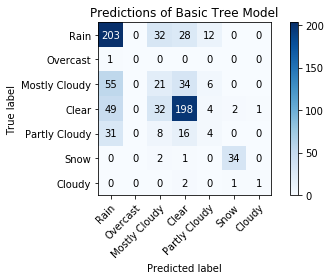

In [144]:
plot_confusion_matrix(y_ts, y_pred,
                      classes = classes,
                      normalize=False, 
                      title='Predictions of Basic Tree Model',
                      cmap=plt.cm.Blues)

In [193]:
def plot_feature_importances(model):
    n_features = feature_importance.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='orange') 
    plt.yticks(np.arange(n_features), feature_importance.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.savefig("test.png")
    plt.show();

In [189]:
features = feature_importance.columns.values
%store features

Stored 'features' (ndarray)


In [190]:
test_vis = clf.feature_importances_

In [688]:
%store test_vis

Stored 'test_vis' (ndarray)


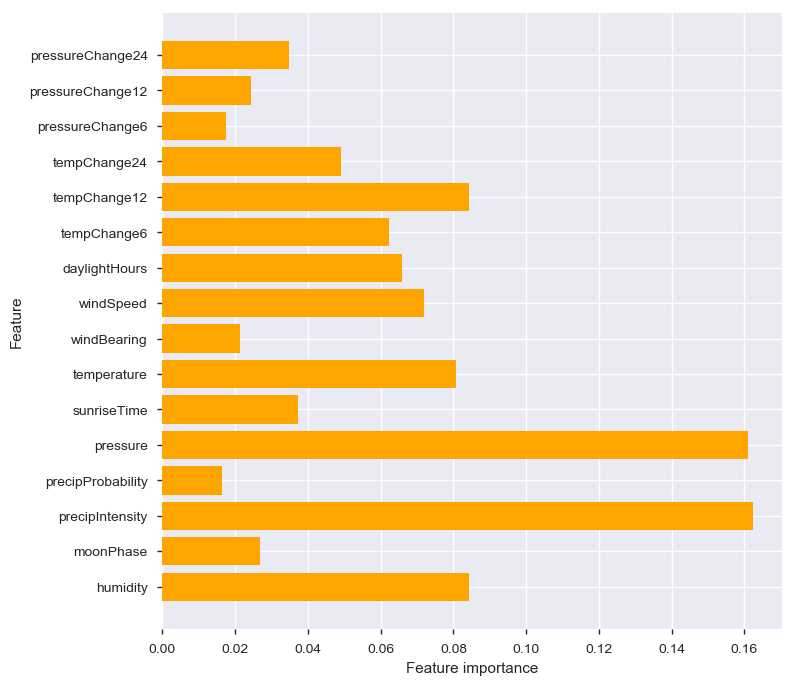

NoneType

In [194]:
type(plot_feature_importances(clf))

In [705]:
model_copy['time'].dtype

dtype('<M8[ns]')

We can see that the feature which explicitly names the precipitation type is significantly affecting the model by about 5% accuracy.  Given the situation, this information is either unrealistic or intuitive.  If you can see the precipitation, you don't need to guess at the weather.  If you 
can't how would you be able to know to gather the data.

In the future we will attempt to guess future weather with this model, but for now we should leave this feature out. and still be happy with the 42% improvement over a random guess!

### 4th Iteration : Ensemble Methods

#### XGBoost

In [116]:
import xgboost as xgb
import timeit

In [125]:
%%time

clf = xgb.XGBClassifier()
clf.fit(x_tr, y_tr)
training_preds = clf.predict(x_tr)
val_preds = clf.predict(x_ts)
training_accuracy = accuracy_score(y_tr, training_preds)
val_accuracy = accuracy_score(y_ts, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

param_grid = {
    "learning_rate": [0.1, 0.2],
    'max_depth': [5, 4, 3],
    'min_child_weight': [10],
    'subsample': [0.7, 1],
    'n_estimators': [5, 30, 100, 250],
}

grid_xgb = GridSearchCV(clf, param_grid, scoring='accuracy', cv=4, n_jobs=-1)
grid_xgb.fit(x_tr, y_tr)

best_parameters = grid_xgb.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(x_tr)
val_preds = grid_xgb.predict(x_ts)
training_accuracy = accuracy_score(y_tr, training_preds)
val_accuracy = accuracy_score(y_ts, val_preds)

print('')




print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation Accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 78.99%
Validation accuracy: 67.87%


C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning:

The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.



Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 3
min_child_weight: 10
n_estimators: 100
subsample: 0.7


Training Accuracy: 76.45%
Validation Accuracy: 67.87%
Wall time: 52.4 s


<h4 style="color:800000">XGBoost preforms better than a single decision tree.</h4>

Training Accuracy: 72.15% <br>
Validation accuracy: 66.71%

#### KMeans

In [663]:
from sklearn.cluster import KMeans # import from sklearn

k_means = KMeans(n_clusters=7) # Must set number of clusters at initialization time!

k_means.fit(X) # Run the clustering algorithm

cluster_assignments = k_means.predict(X) # Generate cluster index values for each row in df

In [665]:
from sklearn.metrics import calinski_harabaz_score


print(calinski_harabaz_score(X, cluster_assignments))

218.26418984808146


#### KMeans should be used for unknown labels

This clustering technique's strength is in that it doesn't require supervision.  It's hard to tell initially if this method would be better than the others but the CH score is not very promising.

#### Support Vector Machine

In [127]:
from sklearn.svm import SVC

In [128]:
%%time

svm_clf = SVC(gamma = 'auto')

svm_clf.fit(x_tr, y_tr)

print(svm_clf.score(x_tr, y_tr), '\n\n', svm_clf.score(x_ts, y_ts))

svm_clf = SVC()

param_grid = [{"C" : [0.001, 0.01, 0.1, 1, 10],
             "gamma" : [0.001, 0.01, 1, 10],
             "kernel" : ['rbf', 'linear']
              },
              {'C' : [1.0, 2, 5, 10, 15],
               "kernel" : ['poly', 'linear', 'rbf'],
               "cache_size" : [200],
               "class_weight" : [None],
               "coef0" : [0.0],
               "decision_function_shape" : ['ovr'],
               "degree" : [3],"gamma" : ['auto', 'scale', 0.01],
               "max_iter" : [-1],
               "probability" : [False], 
               "random_state" : [None], 
               "shrinking" : [True, False],
               "tol" : [0.005]
                }]

grid_svm = GridSearchCV(svm_clf, param_grid, cv=4, n_jobs=-1)

grid_svm.fit(x_tr, y_tr)
best_parameters = grid_svm.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_svm.predict(x_tr)
val_preds = grid_svm.predict(x_ts)
training_accuracy = accuracy_score(y_tr, training_preds)
val_accuracy = accuracy_score(y_ts, val_preds)


print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation Accuracy: {:.4}%".format(val_accuracy * 100))


0.722007722007722 

 0.6555269922879178


C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning:

The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.



Grid Search found the following optimal parameters: 
C: 1.0
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: 'ovr'
degree: 3
gamma: 'auto'
kernel: 'rbf'
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.005

Training Accuracy: 72.2%
Validation Accuracy: 65.55%
Wall time: 1min 2s


#### SVM does not  out compete XGBoost

Training Accuracy: 71.37% <br>
Validation accuracy: 66.91%

#### Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
%%time

forestclf = RandomForestClassifier()

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth" : [4,5,7,8],
    "max_features" : ['auto'],
    "max_leaf_nodes" : [None],
    "min_impurity_decrease" : [0.0],
    "min_impurity_split" : [None],
    "min_samples_leaf" : [1,0.5],
    "min_samples_split" : [2,3,4],
    "min_weight_fraction_leaf" : [0.0],
    "n_estimators" : [75,100,200,250],
}

grid_forest = GridSearchCV(forestclf, param_grid, cv=4, n_jobs = -1)
grid_forest.fit(x_tr, y_tr)

best_parameters = grid_forest.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_forest.predict(x_tr)
val_preds = grid_forest.predict(x_ts)
training_accuracy = accuracy_score(y_tr, training_preds)
val_accuracy = accuracy_score(y_ts, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation Accuracy: {:.4}%".format(val_accuracy * 100))

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning:

The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.



Grid Search found the following optimal parameters: 
criterion: 'gini'
max_depth: 8
max_features: 'auto'
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_impurity_split: None
min_samples_leaf: 1
min_samples_split: 4
min_weight_fraction_leaf: 0.0
n_estimators: 200

Training Accuracy: 78.32%
Validation Accuracy: 68.25%
Wall time: 1min 58s


#### Slightly more accurate than the XGBoost model but significantly slower.

Training Accuracy: 76.05% <br>
Validation accuracy: 67.47%

## Future Designs

This process so far exhibits one cycle.  To me, certain parameters make more sense to hold off on before adusting.   Upsampling the days with precipitation would create a better data set.  Collecting more rows, which I have done perdiodically due to API call restrictions, will do the same.  With this dataset I will be doing a more exhaustive Grid Seach, using pipelines, of the two best preforming models.

Any future work I would funnel through a Random Forest or an XGBoost model.

### Bonus iteration : Time Shifted

Predicting the current outlook is a good training ground.  The serious task lies in predicting the future.
<ul>
    <li> Seasonality v Trend v Residuals/Noise </li>
    <li> Stationairty Check </li>
    <li> Test different Intervals </li>

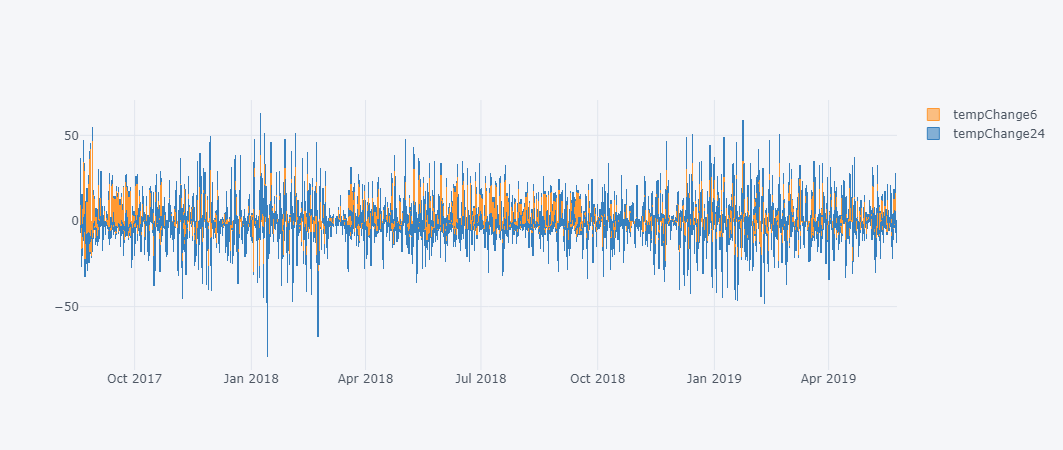

In [57]:
model_copy[['tempChange6', 'tempChange24']].iplot(

    kind='bar',
barmode='stack')

In [201]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd 

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet as proph

In [220]:
ts = pd.concat([model_copy['time'], model_copy['temperature']],
               axis=1)
ts.head()

,time,temperature
time,,
2017-08-20 00:00:00,2017-08-20 00:00:00,65.53
2017-08-20 06:03:33,2017-08-20 06:03:33,65.82
2017-08-20 12:00:00,2017-08-20 12:00:00,73.51
2017-08-20 19:51:39,2017-08-20 19:51:39,71.49
2017-08-21 00:00:00,2017-08-21 00:00:00,63.41


In [221]:
ts = ts.rename(index=str, columns={'time' : 'ds', 'temperature' : 'y'})
ts.head()


,ds,y
time,,
2017-08-20 00:00:00,2017-08-20 00:00:00,65.53
2017-08-20 06:03:33,2017-08-20 06:03:33,65.82
2017-08-20 12:00:00,2017-08-20 12:00:00,73.51
2017-08-20 19:51:39,2017-08-20 19:51:39,71.49
2017-08-21 00:00:00,2017-08-21 00:00:00,63.41


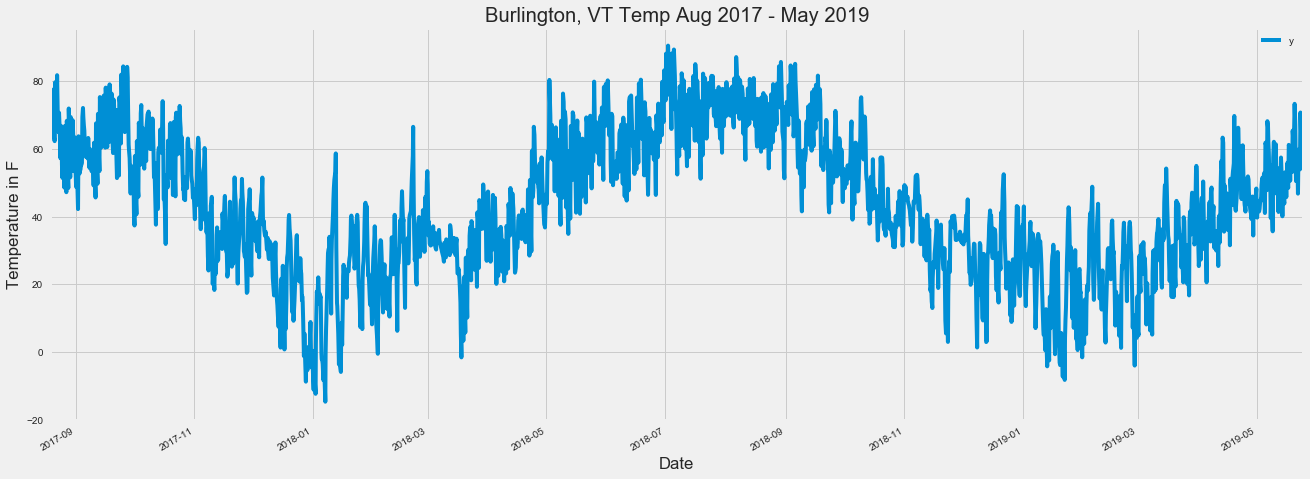

In [234]:
ax = ts.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('Temperature in F')
ax.set_xlabel('Date')
plt.savefig('Temp over 2 years')
plt.title('Burlington, VT Temp Aug 2017 - May 2019')
plt.show();

In [247]:
Model = proph(interval_width=0.95)
Model.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [227]:
future_dates = Model.make_future_dataframe(periods=36, freq='D')
future_dates.tail()

,ds
2622,2019-06-25 20:24:10
2623,2019-06-26 20:24:10
2624,2019-06-27 20:24:10
2625,2019-06-28 20:24:10
2626,2019-06-29 20:24:10


In [228]:
forecast = Model.predict(future_dates)

In [229]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-19 00:00:00,67.560142,49.075855,88.405417,67.560142,67.560142,-0.295390,-0.295390,-0.295390,-0.215686,-0.215686,-0.215686,-0.079704,-0.079704,-0.079704,0.0,0.0,0.0,67.264752
1,2017-08-19 06:02:23,67.494262,44.851723,82.563710,67.494262,67.494262,-4.067448,-4.067448,-4.067448,-3.695265,-3.695265,-3.695265,-0.372183,-0.372183,-0.372183,0.0,0.0,0.0,63.426814
2,2017-08-19 12:00:00,67.429248,51.552488,89.318940,67.429248,67.429248,4.253019,4.253019,4.253019,4.922517,4.922517,4.922517,-0.669497,-0.669497,-0.669497,0.0,0.0,0.0,71.682267
3,2017-08-19 19:53:17,67.343206,51.339625,90.410735,67.343206,67.343206,3.890313,3.890313,3.890313,4.818095,4.818095,4.818095,-0.927782,-0.927782,-0.927782,0.0,0.0,0.0,71.233519
4,2017-08-20 00:00:00,67.298354,47.361542,84.711216,67.298354,67.298354,-1.179161,-1.179161,-1.179161,-0.215686,-0.215686,-0.215686,-0.963475,-0.963475,-0.963475,0.0,0.0,0.0,66.119193


In [230]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2622,2019-06-25 20:24:10,68.046656,47.962597,88.820914
2623,2019-06-26 20:24:10,68.113359,47.608968,87.645495
2624,2019-06-27 20:24:10,67.687061,47.552872,87.599922
2625,2019-06-28 20:24:10,68.100487,49.176439,88.212464
2626,2019-06-29 20:24:10,67.405934,46.608712,87.318944


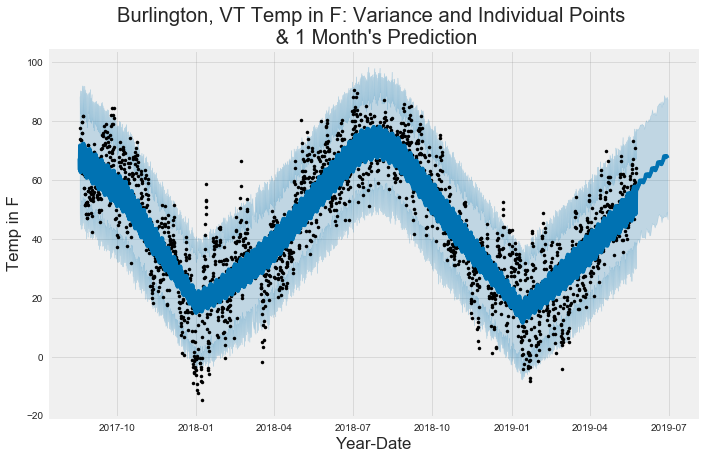

In [250]:
Model.plot(forecast, uncertainty=True)
plt.ylabel('Temp in F')
plt.xlabel('Year-Date')
plt.title("Burlington, VT Temp in F: Variance and Individual Points \n & 1 Month's Prediction")
plt.savefig('Prediction')
plt.show()

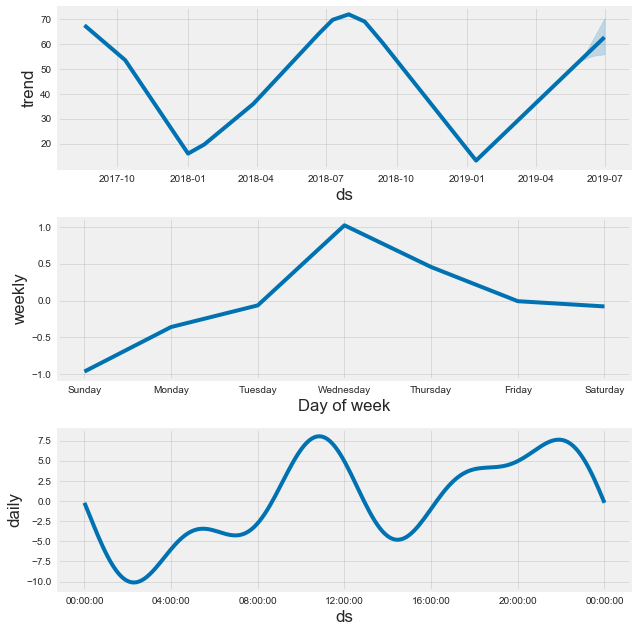

In [248]:
Model.plot_components(forecast)
plt.savefig('Trend Decomposition Temp')
plt.show()

In [240]:
ps = pd.concat([model_copy['time'], model_copy['pressure']],
               axis=1)
ps = ps.rename(index=str, columns={'time' : 'ds', 'pressure' : 'y'})

ps.head()

,ds,y
time,,
2017-08-20 00:00:00,2017-08-20 00:00:00,1010.01
2017-08-20 06:03:33,2017-08-20 06:03:33,1012.76
2017-08-20 12:00:00,2017-08-20 12:00:00,1016.09
2017-08-20 19:51:39,2017-08-20 19:51:39,1016.64
2017-08-21 00:00:00,2017-08-21 00:00:00,1018.80


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


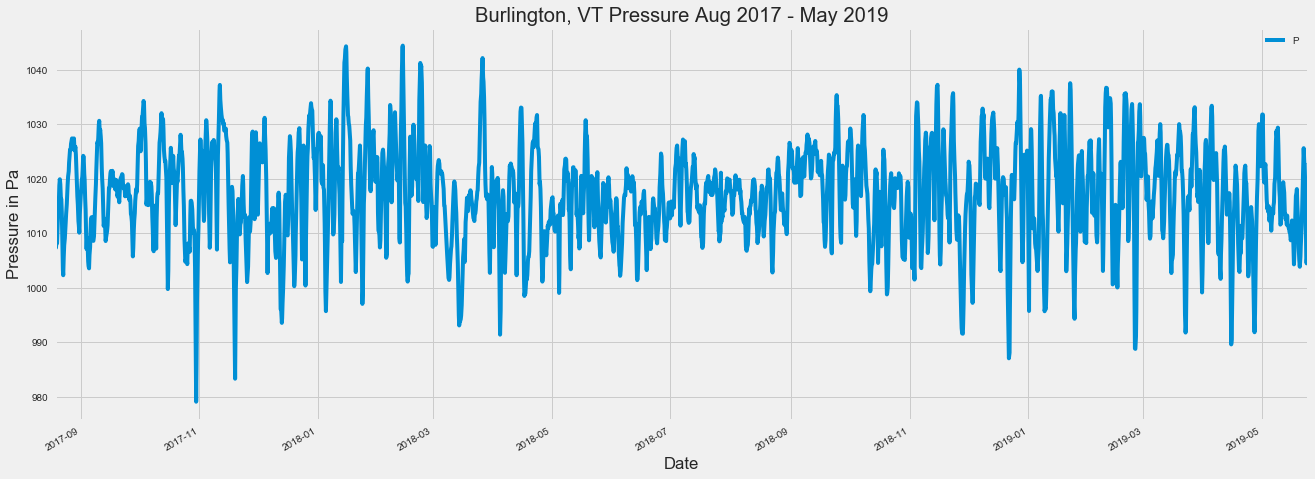

In [251]:
Model = proph(interval_width=0.95)
Model.fit(ps)

ax = ps.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('Pressure in Pa')
ax.set_xlabel('Date')
plt.savefig('Pressure over 2 years')
plt.title('Burlington, VT Pressure Aug 2017 - May 2019')
plt.legend('Pressure')
plt.show();

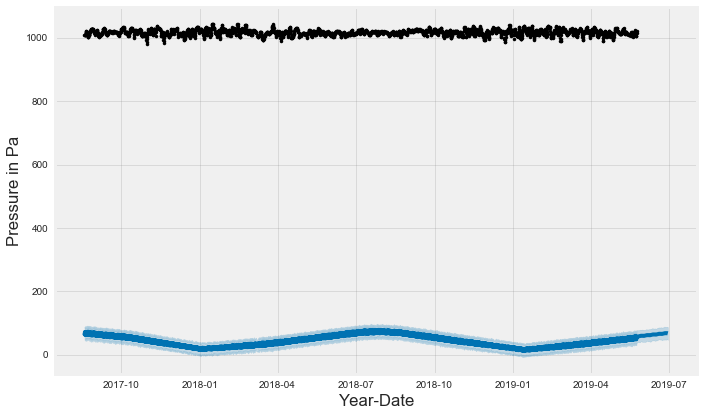

In [252]:
Model.plot(forecast, uncertainty=True)
plt.ylabel('Pressure in Pa')
plt.xlabel('Year-Date')
plt.savefig('Pressure Prediction')
plt.show();

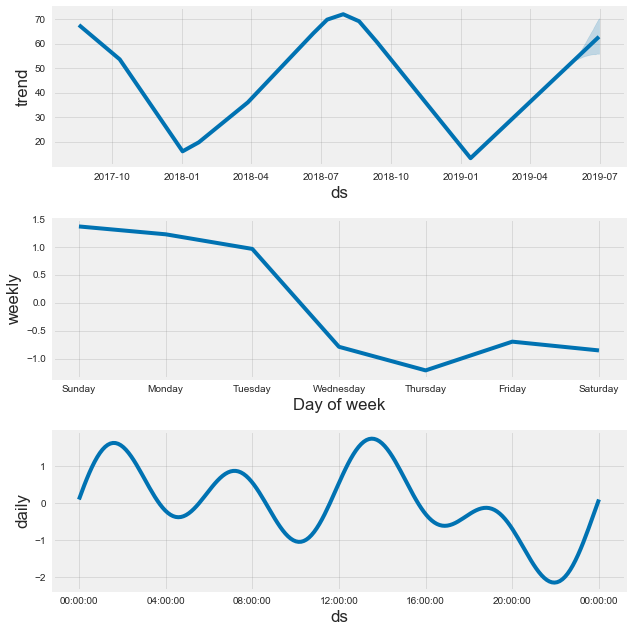

In [245]:
Model.plot_components(forecast)
plt.savefig('Trend Decomposition Pressure')
plt.show()